In [5]:
import numpy as np
import pandas as pd

import os, ast
    
import library as lib
from library import GlobalVars
import faiss_experiment as faiss_tool

import matplotlib.pyplot as plt


#concatenate the results from multiple rounds in order to agregate the results
lib.concat_csvs([
            GlobalVars.experiments_path + '__executed_faiss_experiments_index_ivf_all_round0_kfold5.csv', \
            GlobalVars.experiments_path + '__executed_faiss_experiments_index_ivf_all_round1_kfold5.csv', \
            GlobalVars.experiments_path + '__executed_faiss_experiments_index_ivf_all_round2_kfold5.csv',\
            GlobalVars.experiments_path + '__executed_faiss_experiments_index_ivf_all_round3_kfold5.csv',\
            GlobalVars.experiments_path + '__executed_faiss_experiments_index_ivf_all_round4_kfold5.csv'], GlobalVars.experiments_path + '__executed_faiss_experiments_index_ivf_all_round_all_kfold5.csv')


,segment_lenght,segment_overlap,feature,vector_operation,metric_type,vote_type,neighbors,index_params,skipped,accuracy,...,precision_1,precision_2,precision_3,training_set_size,testing_set_size,train_elapsed_time,predict_elapsed_time,train_used_memory,predict_used_memory,row_key
0,10,all,pe-mfcc_40,mean,correlation,uniform,15,"{'params':'IVF1000,Flat', 'nprobe': 20}",False,0.924314,...,NaN,NaN,NaN,159633.6,39908.4,8.251735,4.330666,25.736412,769.256250,3c25fa8628f1845095de6e4ac1a0c5a1
1,10,all,pe-mfcc_40,mean,correlation,uniform,15,"{'params':'IVF1000,Flat', 'nprobe': 40}",False,0.924588,...,NaN,NaN,NaN,159633.6,39908.4,8.945234,5.482492,25.736412,866.803125,ebf0313b92a535d80bd54b78b83a16ab
2,10,all,pe-mfcc_40,mean,correlation,uniform,15,"{'params':'IVF1000,Flat', 'nprobe': 100}",False,0.924638,...,NaN,NaN,NaN,159633.6,39908.4,10.354764,9.507405,25.736412,1007.693750,b1efdb14bd61d0289769c156be96a683
3,10,all,pe-mfcc_40,mean,correlation,uniform,15,"{'params':'IVF2000,Flat', 'nprobe': 40}",False,0.924598,...,NaN,NaN,NaN,159633.6,39908.4,15.559766,3.559637,25.896629,856.553125,03403254991a345141319b88c69d5d32
4,10,all,pe-mfcc_40,mean,correlation,uniform,15,"{'params':'IVF2000,Flat', 'nprobe': 100}",False,0.924643,...,NaN,NaN,NaN,159633.6,39908.4,17.119394,5.131326,25.896629,1033.415625,d61c3f1fd539b28b81de09673eef93bf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,10,all,pe-mfcc_40,mean_iqr25,correlation,uniform,20,"{'params':'IVF2000,PQ10', 'nprobe': 500}",False,0.921808,...,NaN,NaN,NaN,159633.6,39908.4,52.553744,11.404045,3.099961,1472.818750,24d42d72d60ab3e40f92207702b31cd7
1196,10,all,pe-mfcc_40,mean_iqr25,correlation,uniform,20,"{'params':'IVF4000,PQ10', 'nprobe': 100}",False,0.921035,...,NaN,NaN,NaN,159633.6,39908.4,49.476813,2.037038,3.420396,963.009375,a86d86a897800c2441d8fcd151276bb9
1197,10,all,pe-mfcc_40,mean_iqr25,correlation,uniform,20,"{'params':'IVF4000,PQ10', 'nprobe': 250}",False,0.920950,...,NaN,NaN,NaN,159633.6,39908.4,35.016596,2.865245,3.420396,1222.625000,89a7315ef95b198db82c1011ea9a0eb8
1198,10,all,pe-mfcc_40,mean_iqr25,correlation,uniform,20,"{'params':'IVF4000,PQ10', 'nprobe': 500}",False,0.920905,...,NaN,NaN,NaN,159633.6,39908.4,34.972232,4.769151,3.420396,1660.603125,c81a4b1f6f200632249af12fa8ce5319


Error generating milvus fields: 'str' object has no attribute 'get'
  indexFactory_full2 accuracy_min accuracy_mean accuracy_max train_used_memory_min train_time_min predict_time_min
0  IVF2000,Flat-None       92.18%        92.41%       92.61%                 25.90        13.0768           2.3082
1  IVF4000,Flat-None       92.19%        92.41%       92.61%                 26.22        24.0491           3.3236
2  IVF1000,Flat-None       92.16%        92.40%       92.61%                 25.74         5.9533           2.2929
3   IVF2000,SQ8-None       92.23%        92.43%       92.59%                  7.63        14.1864           4.0955
4   IVF4000,SQ8-None       92.22%        92.42%       92.58%                  7.95        27.0829           5.4221
5   IVF1000,SQ8-None       92.22%        92.43%       92.58%                  7.47         7.2226           4.4068
6  IVF4000,PQ10-None       88.54%        90.57%       92.20%                  3.42        34.8279           1.7621
7  IVF2000,P

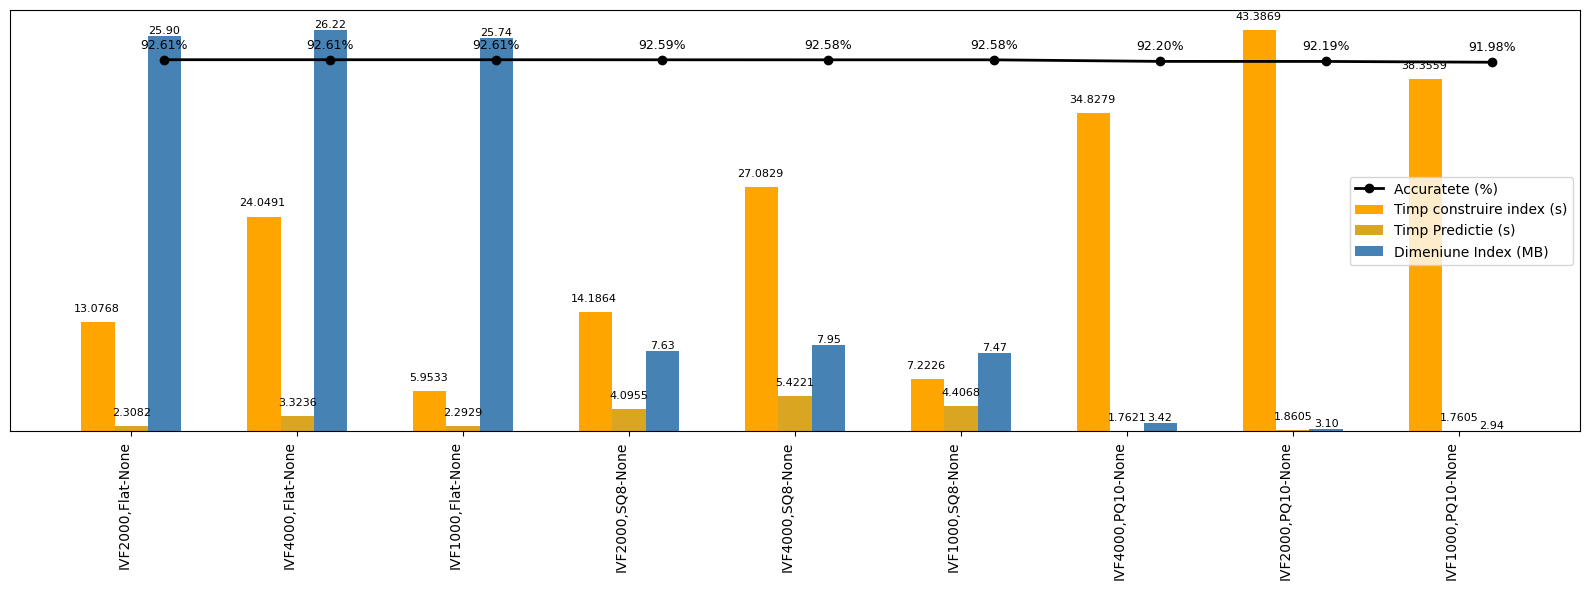

In [10]:
def scale_values(df):
    # Grupuri logice
    time_cols = ['train_time_min', 'predict_time_min']
    memory_cols = ['train_used_memory_min']

    # 1. Concatenăm valorile din cele 2 coloane de timp și normalizăm împreună
    all_time_values = pd.concat([df[col] for col in time_cols])
    min_time = all_time_values.min()
    max_time = all_time_values.max()

    # Normalizare pe ambele coloane de timp
    for col in time_cols:
        df[f"{col}_scaled"] = (df[col] - min_time) / (max_time - min_time)

    # 2. La fel pentru memorie
    all_memory_values = pd.concat([df[col] for col in memory_cols])
    min_mem = all_memory_values.min()
    max_mem = all_memory_values.max()

    for col in memory_cols:
        df[f"{col}_scaled"] = (df[col] - min_mem) / (max_mem - min_mem)
    
    return df
    
def format_time_on_plot(time_value):
    return f"{time_value:.4f}"

def format_size_on_plot(size_value):
    return (f"{size_value:.2f}")

def represent_index_performances_v3(df, group_field, image_name, use_index_memory = True, use_train_time = True, angle_label=90):
    accuracy_field = "accuracy_max"
    x = range(len(df))
    x_labels = df[group_field] #.apply(lambda item: ast.literal_eval(item)["params"])
    bar_width = 0.2

    df = scale_values(df)
    fig, ax = plt.subplots(figsize=(16, 6))

    if (use_train_time):
        ax.bar([p - bar_width for p in x], df['train_time_min_scaled'], width=bar_width, label='Timp construire index (s)', color='orange')
    ax.bar(x, df['predict_time_min_scaled'], width=bar_width, label='Timp Predictie (s)', color='goldenrod')


    # Bare pentru memorie (2)
    if (use_index_memory):
        ax.bar([p + bar_width for p in x], df['train_used_memory_min_scaled'], width=bar_width, label='Dimeniune Index (MB)', color='steelblue')

    # Linie pentru accuracy
    ax.plot([p + bar_width for p in x], df[accuracy_field], color='black', marker='o', linewidth=2, label='Accuratete (%)')

    # Afișare valori reale pe linia de accuracy
    for i, row in df.iterrows():
        text_pos_y = row[accuracy_field] + 0.02
        ax.text(i + bar_width, text_pos_y, f"{100 * row[accuracy_field]:.2f}%", ha='center', va='bottom', fontsize=9, color='black')
        
    for i, row in df.iterrows():
        if (use_train_time):
            ax.text(i - bar_width - 0.01, row['train_time_min_scaled'] + 0.02, format_time_on_plot(row['train_time_min']), ha='center', va='bottom', fontsize=8)        
        ax.text(i, row['predict_time_min_scaled'] + 0.02, format_time_on_plot(row['predict_time_min']), ha='center', va='bottom', fontsize=8)
        if (use_index_memory):
            ax.text(i + bar_width, row['train_used_memory_min_scaled'], format_size_on_plot(row['train_used_memory_min']), ha='center', va='bottom', fontsize=8)
        
    ax.set_yticks([]) 
    ax.set_xticks(x)
    ax.set_xticklabels(x_labels, rotation=angle_label, ha='right')
    plt.grid(False)
    #plt.grid(True, which='major', axis='y', linestyle='--', linewidth=0.2, color='gray')
    #plt.grid(True, which='major', axis='x', linestyle='--', linewidth=0.2, color='gray')
    ax.legend()
    plt.tight_layout()
    plt.savefig(image_name, format="svg")
    plt.show()

def extract_all_faiss_results(results_file_path, group_field = 'indexFactory', sort_by = 'accuracy_max', sort_ascending=False):
    df = pd.read_csv(results_file_path)
    
    #df = df[df['index_params'].str.contains('PQ')]
    agg_columns = ['accuracy', 'train_time', 'predict_time', 'train_used_memory', 'predict_used_memory']

    try:
        df['indexTypeMilvus'] = df['index_params'].apply(lambda item: ast.literal_eval(item).get("index_type"))
        df['nListmilvus'] = df['index_params'].apply(lambda item: str(ast.literal_eval(item).get("params").get("nlist")))
        df['pq_m_milvus'] = df['index_params'].apply(lambda item: str(ast.literal_eval(item).get("params").get("m", "")))
        df['nprobeMilvus'] = df['index_params'].apply(lambda item: str(ast.literal_eval(item).get("nprobe")))
        df['indexFactoryMilvus'] = 'IVF' + df['nListmilvus'] + df['indexTypeMilvus'].str.replace('IVF_FLAT', ',Flat')
        df['indexFactoryMilvus'] = df['indexFactoryMilvus'].str.replace('IVF_SQ8', ',SQ8') 
        
        df['indexFactoryMilvus'] = np.where(df['indexTypeMilvus']=='IVF_PQ', 'IVF' + df['nListmilvus'] + ",PQ" + df['pq_m_milvus'].astype(str), df['indexFactoryMilvus'])        
        df['indexFactoryMilvus2'] = df['indexTypeMilvus'] + "-" + df['nListmilvus'] + "-" + df['nprobeMilvus'] 
        df = df[df['pq_m_milvus'] != '8'] #exclude PQ8 
    except Exception as e:
        print("Error generating milvus fields:", e)
        pass
    df['indexFactory'] = df['index_params'].apply(lambda item: ast.literal_eval(item).get("params"))
    df['nprobe'] = df['index_params'].apply(lambda item: str(ast.literal_eval(item).get("nprobe")))
    df['efConstruction'] = df['index_params'].apply(lambda item: str(ast.literal_eval(item).get("efConstruction")))
    df['efSearch'] = df['index_params'].apply(lambda item: str(ast.literal_eval(item).get("efSearch")))
    try:
        df['indexFactory_full1'] = df['indexFactory'] + "-" + df['nprobe']
        df['indexFactory_full2'] = df['indexFactory'] + "-" + df['efConstruction']
        df['indexFactory_full3'] = df['indexFactory'] + "-" + df['efConstruction'] + "-" + df['efSearch']
    except:
        print("Error generating other index fields:", e)
        pass
        
    #df = df[df['index_params'].str.contains(',PQ')]
    #print(df.head(100).to_string())
    result = df.groupby(group_field)[agg_columns].agg(['min', 'mean', 'max'])
    result.columns = ['_'.join(col).strip() for col in result.columns.values]
    result = result.reset_index()

    # Sorting based on accuracy descending
    result = result.sort_values(by=sort_by, ascending=sort_ascending)
    result = result.reset_index(drop=True)
    df_reduced = result[[group_field, 'accuracy_min', 'accuracy_mean', 'accuracy_max', 'train_used_memory_min', 'train_time_min', 'predict_time_min']].copy()
    
    df_formated = df_reduced.copy()
    for col in ['accuracy_min', 'accuracy_mean', 'accuracy_max']:
        df_formated[col] = df_formated[col] *100
        df_formated[col] = df_formated[col].apply(lambda x: f"{x:.2f}%")
    df_formated["train_used_memory_min"] = df_formated["train_used_memory_min"].map(lambda x: f"{x:.2f}")
    df_formated["train_time_min"] = df_formated["train_time_min"].map(lambda x: f"{x:.4f}")
    df_formated["predict_time_min"] = df_formated["predict_time_min"].map(lambda x: f"{x:.4f}")
    print(df_formated.to_string(index=True))
    return df_reduced

results_file_path = GlobalVars.experiments_path + '__executed_faiss_experiments_index_ivf_all_round_all_kfold5.csv'
group_field = 'indexFactory_full2'
df = extract_all_faiss_results(results_file_path, group_field)
represent_index_performances_v3(df, group_field,  "index_hnsw_results_bigdataset.svg", angle_label = 90)

In [12]:
# results_file_path='experiments' + os.sep + '20250620_executed_knn_configs_results_v3_all.csv'
df_sorted = lib.load_resuls_file(results_file_path)
top1_n = 50
top2_n = 100
df_top1, df_top2 = lib.print_results_stat(df_sorted, top1_n, top2_n)


# faiss_tool.report_results(results_file_path, 20)

#results_file_path='experiments' + os.sep + 'knn_comparations.csv'


 segment_lenght segment_overlap    feature vector_operation metric_type vote_type  neighbors                              index_params  accuracy  precision_0  precision_1  precision_2  precision_3  train_time  predict_time  train_used_memory  predict_used_memory
             10             all pe-mfcc_40       mean_iqr25 correlation   uniform         20   {'params':'IVF2000,Flat', 'nprobe': 40}  0.926122          NaN          NaN          NaN          NaN   15.089544      3.256276          25.896629           878.478125
             10             all pe-mfcc_40       mean_iqr25 correlation   uniform         20   {'params':'IVF2000,Flat', 'nprobe': 40}  0.926122          NaN          NaN          NaN          NaN   15.127719      2.971662          25.896629           898.318750
             10             all pe-mfcc_40       mean_iqr25 correlation   uniform         20   {'params':'IVF2000,Flat', 'nprobe': 40}  0.926122          NaN          NaN          NaN          NaN   14.647988   